In [1]:
# notebook dependencies
!source pdf-env/bin/activate # initiating virtual environment
from PyPDF2 import PdfReader

# ignore all warning messages
import warnings
warnings.simplefilter("ignore")

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

import os # for caching purposeses
import pandas as pd
import numpy as np

# visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# plotly module/library
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "notebook_connected"

# regular expression import
import re

# JSON import
import json

# uni-code library
import unicodedata

# natural language toolkit library/modules
import nltk
from nltk.stem import PorterStemmer, LancasterStemmer, WordNetLemmatizer

from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords

from pprint import pprint

In [2]:
# read in the pdf file

reader = PdfReader("ai_report.pdf")

In [3]:
# what is the 'reader' object?

type(reader)

PyPDF2._reader.PdfReader

In [4]:
# print the total number of pages in the PDF
# 'pages' is a method that will return the total number of pages as a virtual list

print(f"There are {len(reader.pages)} Pages")

There are 217 Pages


In [5]:
# # get the first page (index 0) 
# page = reader.pages[0]
# # Use extract_text() to get the text of the page
# print(page.extract_text())

# # go through every page and get the text
# for i in range(len(reader.pages)):
#   page = reader.pages[i]
#   print(page.extract_text())

In [6]:
# open the PDF file
# with open('ai_report.pdf', 'rb') as file:
#     reader = PdfReader(file)

#     # create a text file for writing
#     with open('ai_report.txt', 'w') as output_file:

#         # go through every page and write the text to the file
#         for i in range(len(reader.pages)):
#             page = reader.pages[i]
#             text = page.extract_text()

#             # write text in 4,000 character chunks with two line breaks
#             chunk_size = 4000
#             for j in range(0, len(text), chunk_size):
#                 chunk = text[j:j + chunk_size]
#                 output_file.write(chunk)
#                 output_file.write('\n\n')

#         print("Text has been written to the file.")

In [7]:
# let's convert the txt file into a csv file to more easily work with it

data = pd.read_csv('ai_report.txt', delimiter='\t')

In [8]:
# now writing the data into a CSV file 

data.to_csv('ai_report.csv', index = False)

In [9]:
# read-in the CSV file as a pandas Dataframe

df = pd.read_csv('ai_report.csv')

In [10]:
# check the df shape

print(f'initial df shape: {df.shape}')

initial df shape: (6148, 1)


In [11]:
# checking what the df looks like

df.head()

,Building a Tech Future
0,Aligned With the Public InterestAI and
1,Human
2,Rights
3,| AI and Human Rights •2
4,AI and Human Rights:


In [12]:
# let's rename the column header 

df = df.rename(columns={'Building a Tech Future': 'text'})
df.head() # rename did not work

,Building a Tech Future
0,Aligned With the Public InterestAI and
1,Human
2,Rights
3,| AI and Human Rights •2
4,AI and Human Rights:


In [13]:
# let's see if there are any special characters in the column header

df.columns # here we see that there are spaces in the column header
# we'll want to account for this, but simplest way will be to copy and past into previous renaming syntax

Index(['Building a Tech Future  '], dtype='object')

In [14]:
# let's rename the column header 

df = df.rename(columns={'Building a Tech Future  ': 'text'})
df.head() # great, checks out

,text
0,Aligned With the Public InterestAI and
1,Human
2,Rights
3,| AI and Human Rights •2
4,AI and Human Rights:


In [15]:
# checking the dataframe information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6148 entries, 0 to 6147
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    6148 non-null   object
dtypes: object(1)
memory usage: 48.2+ KB


In [16]:
# initial word count

df_copy = df.copy()
df_copy["text_count"] = df_copy["text"].str.split().str.len()
df_copy["text_count"].sum()

65785

## ``Data Cleaning``

In [17]:
# creating a function to clean and normalize the current text data

def initial_clean(text: pd.Series):
    '''Key text cleaning functions'''

    # lowercase the text
    text = text.lower()

    # return only alphanumeric values in text: everything else, convert to whitespace
    text = re.sub("[^a-z0-9\s']", ' ', text)

    # cleans multi-line texts in the data
    text = re.sub(r"[\r|\n|\r\n]+", ' ', text)

    # removing any word/ele <= 2 letters
    text = re.sub(r'\b[a-z]{,2}\b', '', text)
    
    # removing multiple spaces
    text = re.sub(r'\s+', ' ', text)

    # removing beginning and end whitespaces
    text = text.strip()

    # return the text text
    return text

In [18]:
# let's check the head first and then apply the initial clean function

df.head()

,text
0,Aligned With the Public InterestAI and
1,Human
2,Rights
3,| AI and Human Rights •2
4,AI and Human Rights:


In [19]:
# applying the initial cleaning function

df['text'] = df['text'].apply(initial_clean)
df.head() # appears to check out

,text
0,aligned with the public interestai and
1,human
2,rights
3,and human rights 2
4,and human rights


In [20]:
# word count

df["text"].str.split().str.len().sum()

52930

In [21]:
# let's create a function/method to convert the data type as string for easier string manipulation

def clean_data_object(column: str, df: pd.DataFrame):
    '''Function that takes in a column name and dataframe and converts the
    column into a str type data structure for easier string manipulation'''

    # let's first create a new copy of the dataframe
    df_copy = df.copy()

    # update the data type to str
    df_copy[column] = df_copy[column].astype(str)

    # lastly, return the copy of the initial dataframe with the text column as str type
    return df_copy

In [22]:
# let's apply the created function and check the df info

cleaned_df = clean_data_object('text', df)
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6148 entries, 0 to 6147
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    6148 non-null   object
dtypes: object(1)
memory usage: 48.2+ KB


In [23]:
# let's remove 'stopper words' for better text interpretability and future modeling
# we'll do this by creating a function called remove stopwords

def remove_stopwords(text: pd.Series, exclude_words = None):
    '''Function that removes stop words in text'''

    # words to include due to redudancy and regardless of being stopwords
    include_words = [
                    'ai',
                    'artificial',
                    'intelligence',
                    'machine',
                    'learning',
                    'deep',
                    'neural',
                    'networks',
                    'algorithm',
                    'model',
                    'training',
                    'inference',
                    'predictive',
                    'analytics',
                    'automation',
                    'autonomous',
                    'decision',
                    'making',
                    'robotics',
                    'natural',
                    'language',
                    'processing',
                    'computer',
                    'vision',
                    'data',
                    'science',
                    'big',
                    'analysis',
                    'algorithm',
                    'ethics',
                    'fairness',
                    'interpretability',
                    'bias',
                    'transparency',
                    'privacy',
                    'security',
                    'reliability',
                    'trustworthiness',
                    'data',
                    'leakage',
                    'sensitive',
                    'private',
                    'confidential',
                    'identifiable',
                    'personally',
                    'person',
                    'identity',
                    'information',
                    'privacy',
                    'secure',
                    'protection',
                    'protected',
                    'securely',
                    'safely',
                    'encryption',
                    'de-identification',
                    'anonymization',
                    'ethical',
                    'responsibility',
                    'responsible',
                    'safety',
                    'security',
                    'risks'
]


    # initiating a new list of stopwords
    stopword_list = stopwords.words('english')
    
    # adding the additional stopwords to the list
    stopword_list += include_words

    # exclude any preidentified words from the stopword list
    if exclude_words:

        stopword_list = [word for word in stopword_list if word not in exclude_words]

    # split the text into individual words -- using the apply function since we're passing in a pd.Series      
    words = text.apply(lambda x: x.split())
    
    # removing words with two or fewer letters
    words = words.apply(lambda x: [word for word in x if len(word) > 2])

    # filter the text words, and only include words not in stop words list
    filtered_words = words.apply(lambda x: [word for word in x if word not in stopword_list])
    
    # re-join the words into individual text text
    filtered_text = filtered_words.apply(lambda x: ' '.join(x))
    
    # return the text text back: excluding stop words
    return filtered_text

``These words are often discussed in the context of responsible and ethical AI practices, and considering them as stopwords can help filter out
potential data leakage concerns when analyzing text related to these topics.``

* ai: The abbreviation for "artificial intelligence," the overarching field of study and development of intelligent machines and systems.
* artificial: Pertaining to something that is made or produced by humans, in contrast to something occurring naturally.
* intelligence: The capacity to understand, learn, and apply knowledge or skills.
* machine: Refers to a device or system that uses mechanical or electronic processes to perform tasks.
* learning: The process of acquiring knowledge or skills through study, experience, or teaching.
* deep: Relating to deep learning, a subset of machine learning that uses neural networks with multiple layers to learn and represent complex patterns and relationships in data.
* neural: Relating to the brain or the computational models inspired by the structure and function of biological neural networks.
* networks: Refers to interconnected systems or structures, often used to describe neural networks or network architectures.
* algorithm: A set of rules or instructions for solving a problem or performing a specific task, often used in AI and machine learning.
* model: A representation or abstraction of a system or concept, often used in AI to refer to mathematical or computational models.
* training: The process of teaching a machine learning model by providing it with data and adjusting its parameters to improve its performance.
* inference: The process of making predictions or drawing conclusions based on the learned patterns from a trained model.
* predictive: Relating to the ability to make predictions or forecasts based on data and models.
* analytics: The process of discovering meaningful patterns, insights, or trends in data.
* automation: The use of technology to perform tasks or processes with minimal human intervention.
* autonomous: Referring to systems or agents that can operate or make decisions independently without human control.
* decision: The act of making a choice or selecting an option among different possibilities or courses of action.
* making: The process of decision-making or reaching a conclusion based on available information.
* robotics: The branch of technology that deals with the design, construction, and operation of robots.
* natural: Refers to phenomena or behaviors that occur in the physical world or living organisms, often contrasted with artificial or synthetic.
* language: Relating to human language or communication, often used in natural language processing (NLP) and understanding.
* processing: The manipulation, analysis, or transformation of data or information by a computer or system.
* computer: Refers to devices or machines capable of performing computations or carrying out tasks according to instructions.
* vision: Relates to the field of computer vision, which focuses on enabling computers to "see" and understand visual data.
* science: The systematic study and knowledge of the natural and physical world, often used in the context of data science and AI research.
* big: Describes large-scale datasets or systems that require specialized approaches for storage, processing, and analysis.
* analysis: The examination, evaluation, or interpretation of data or information to derive insights or draw conclusions.
* ethics: The moral principles and guidelines that govern human behavior and decision-making, often discussed in the context of AI ethics.
* fairness: The principle of treating individuals or groups impartially and without bias or discrimination, an important consideration in AI.
* interpretability: The ability to understand or explain how an AI model or algorithm makes its decisions or predictions.
* bias: Refers to the presence of systematic errors or prejudices in data or algorithms, which can lead to unfair or discriminatory outcomes.
* transparency: The quality of being open, accountable, and understandable,
* data: Refers to information or raw facts used by AI systems.
* leakage: Implies the unintentional or unauthorized release of data.
* sensitive: Describes data that is confidential or requires special protection.
* private: Relates to data that is personal or not meant for public disclosure.
* confidential: Denotes information that is intended to be kept secret or private.
* identifiable: Pertains to data that can be used to identify individuals.
* personally: Relates to information that is specific to an individual person.
* person: Refers to an individual or human being.
* identity: Relates to the unique characteristics or attributes that define an individual.
* information: General term for data or knowledge.
* privacy: Concerns the protection of personal information and the right to keep it private.
* secure: Refers to the state of being protected from unauthorized access or harm.
* protection: Denotes the act of safeguarding or defending against threats.
* protected: Describes data or systems that are adequately secured.
* securely: Indicates a manner or method that ensures strong security measures.
* safely: Denotes an action or process that is free from risk or harm.
* encryption: Refers to the conversion of data into a coded form to ensure confidentiality.
* de-identification: The process of removing or obscuring identifying information from data.
* anonymization: Similar to de-identification, it involves making data anonymous.
* ethical: Relates to principles and values governing right and wrong behavior.
* responsibility: Denotes being accountable or answerable for one's actions.
* safety: Concerns the prevention of harm or danger.
* security: Relates to measures and practices for protecting against threats or breaches.
* risks: Refers to potential hazards or uncertainties.


In [24]:
# let's filter for any whitespace values in the text column

df = cleaned_df[cleaned_df['text'].str.strip() != '']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6099 entries, 0 to 6146
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    6099 non-null   object
dtypes: object(1)
memory usage: 95.3+ KB


In [25]:
# let's check the current sample of text words in the dataframe

df["text"].sample(20, random_state = 123)

790                                              evolving
803     policy makers technologists and citizens need ...
43                                       89 ellie sakhaee
4273    laws and regulations within and outside the un...
2648    was clear that responsible was natural choice ...
3961    technology and their social context into accou...
1985    how can individuals empowered know and protect...
5302    former coordinator the coalition the report th...
5912    innovation headquartered kenya and serving the...
2886    into your product how you handle data collecti...
6040                 ranking digital rights rankingrights
2180       deployment governance regulation and oversight
1125    companies use turn consumers into forecasting ...
5196                                  people lives easier
613     more regularly and effectively minimize use an...
919     the technology but who may experience its impa...
6080    technology protocol for performance assessment...
2503    value 

In [26]:
type(df.text)

pandas.core.series.Series

In [27]:
# applying the stopword function

df['text'] = remove_stopwords(df['text'])
df['text'].sample(20, random_state = 123)

790                                              evolving
803     policy makers technologists citizens need bett...
43                                          ellie sakhaee
4273    laws regulations within outside united states ...
2648                        clear choice next step career
3961    technology social context account least develo...
1985       individuals empowered know protect rights face
5302    former coordinator coalition report first outl...
5912    innovation headquartered kenya serving global ...
2886                 product handle collection management
6040                 ranking digital rights rankingrights
2180           deployment governance regulation oversight
1125    companies use turn consumers forecasting model...
5196                                  people lives easier
613     regularly effectively minimize use generation ...
919     technology may experience impacts strive repre...
6080    technology protocol performance assessment new...
2503       val

In [28]:
# what are the top 25 most used words across the text?
# at this stage - we can consider merging all the text since the rows are not unique in any meaningful way

combined_text = ' '.join(df['text'])
type(combined_text)

str

In [29]:
# let's sample the string text

combined_text

'aligned public interestai human rights human rights human rights building tech future aligned public interest read download latest version report please visit aihumanrightsreport com 2022 tech human licensed attribution international license requires reusers give credit creator allows reusers distribute remix adapt build upon material medium format noncommercial purposes june 2022 tech human new york united states building tech future aligned public interest human rights table contents 3table contents welcome letter executive summary acknowledgments tech human introduction automated systems civil rights  synthetic media integrity content moderation healthcare surveillance technology technology criminal justice cybersecurity weapons albert fox cahn alberto rodriguez alexa koenig alexandra robinson alice hunsberger anupam chander arthur gwagwa arthur mccallum beena ammanath bruna castro silva camille carlton damini satija tetsubayashi diana nyakundi dunstan allison hope ellie sakhaee ge

In [30]:
# let's now tokenize the string into individual words

tokens = combined_text.split()
type(tokens)

list

In [31]:
# sample the list of words

tokens[0:20] # great, the list checks out!

['aligned',
 'public',
 'interestai',
 'human',
 'rights',
 'human',
 'rights',
 'human',
 'rights',
 'building',
 'tech',
 'future',
 'aligned',
 'public',
 'interest',
 'read',
 'download',
 'latest',
 'version',
 'report']

In [32]:
# let's do one last check of ea. word length 
# in order to to do this more efficiently, let's convert the list into a pandas Series

text_series = pd.Series(tokens)
type(text_series)

pandas.core.series.Series

In [33]:
# the series checks out ok

text_series.head()

0       aligned
1        public
2    interestai
3         human
4        rights
dtype: object

In [34]:
# check individual string values for word length <= 2
# apply boolean masking to accomplish this task 

text_series[text_series.apply(lambda x: len(x) <= 2)]

Series([], dtype: object)

In [35]:
# let's run a quick value counts on the top 20 most frequent words

text_series.value_counts()[0:20]

human           609
rights          541
technology      337
tech            239
systems         234
development     216
impact          192
public          183
people          179
use             172
also            166
social          164
digital         161
need            159
technologies    157
policy          157
new             123
companies       121
potential       118
would           116
dtype: int64

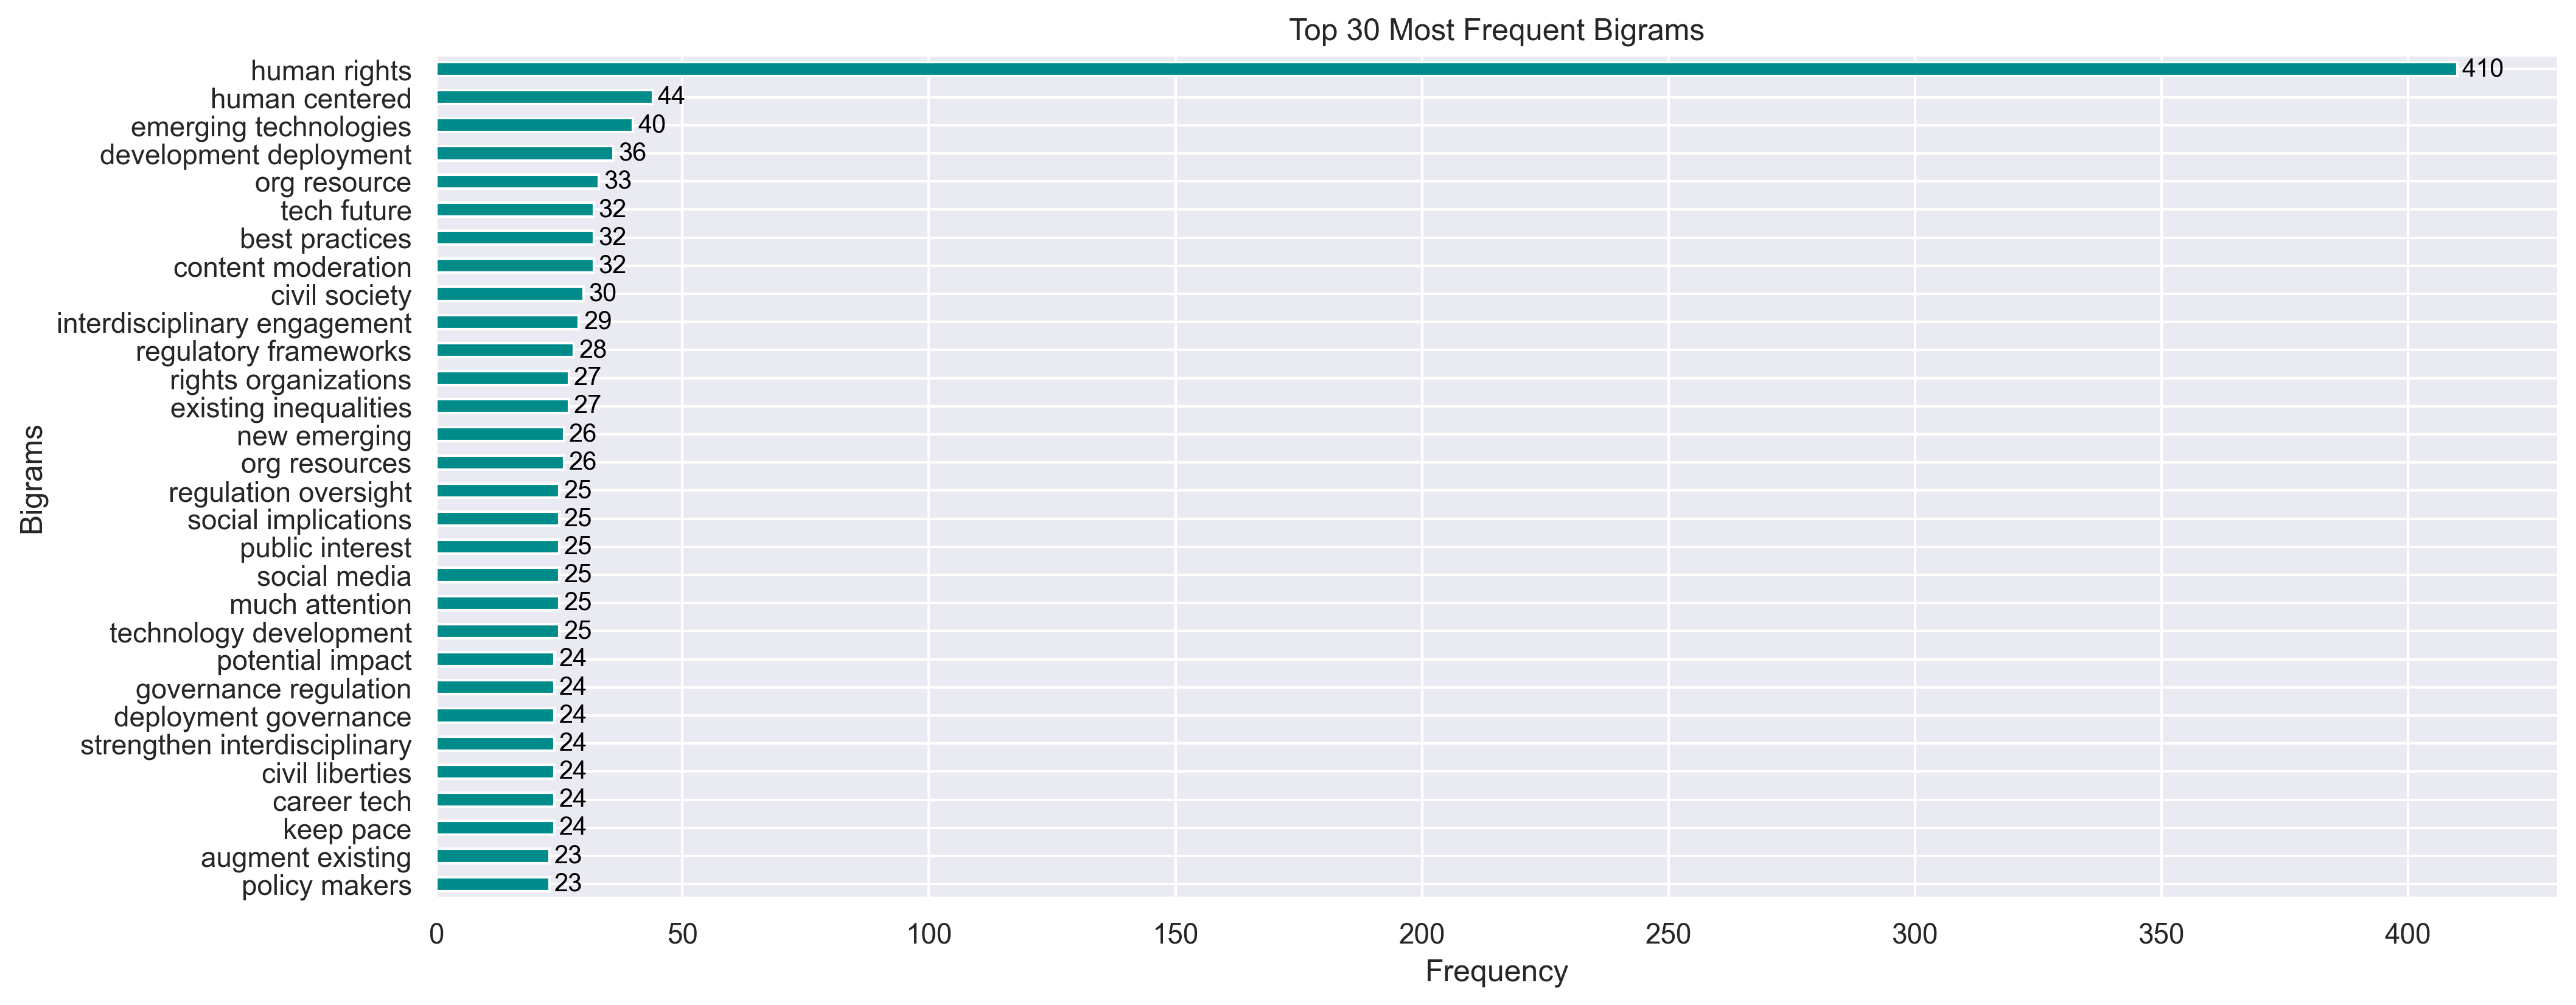

In [36]:
# creating the top 30 bigrams for each program language

bigrams = (pd.Series(nltk.ngrams(text_series, 2))
            .value_counts()
            .head(30))

# sorting the bigrams by count in descending order
bigrams_sorted = bigrams.sort_values(ascending=True)

# plotting the sorted bigrams
ax = bigrams_sorted.plot.barh(figsize=(15, 6), color="darkcyan")

# plt.title(f'{languages[counter]}: Top 20 Most Frequent Bigrams', fontsize = 15)
plt.ylabel('Bigrams')
plt.xlabel('Frequency')
plt.title('Top 30 Most Frequent Bigrams')


# cleaning the bigram labels
ticks, _ = plt.yticks()
labels = [f"{t[0]} {t[1]}" for t in bigrams_sorted.index]
_ = plt.yticks(ticks, labels)

# displaying the total count of each bigram at the end of each bar
for i, v in enumerate(bigrams_sorted.values):
    ax.text(v + 1, i, str(v), color='black', va='center', fontsize=10)


plt.show()

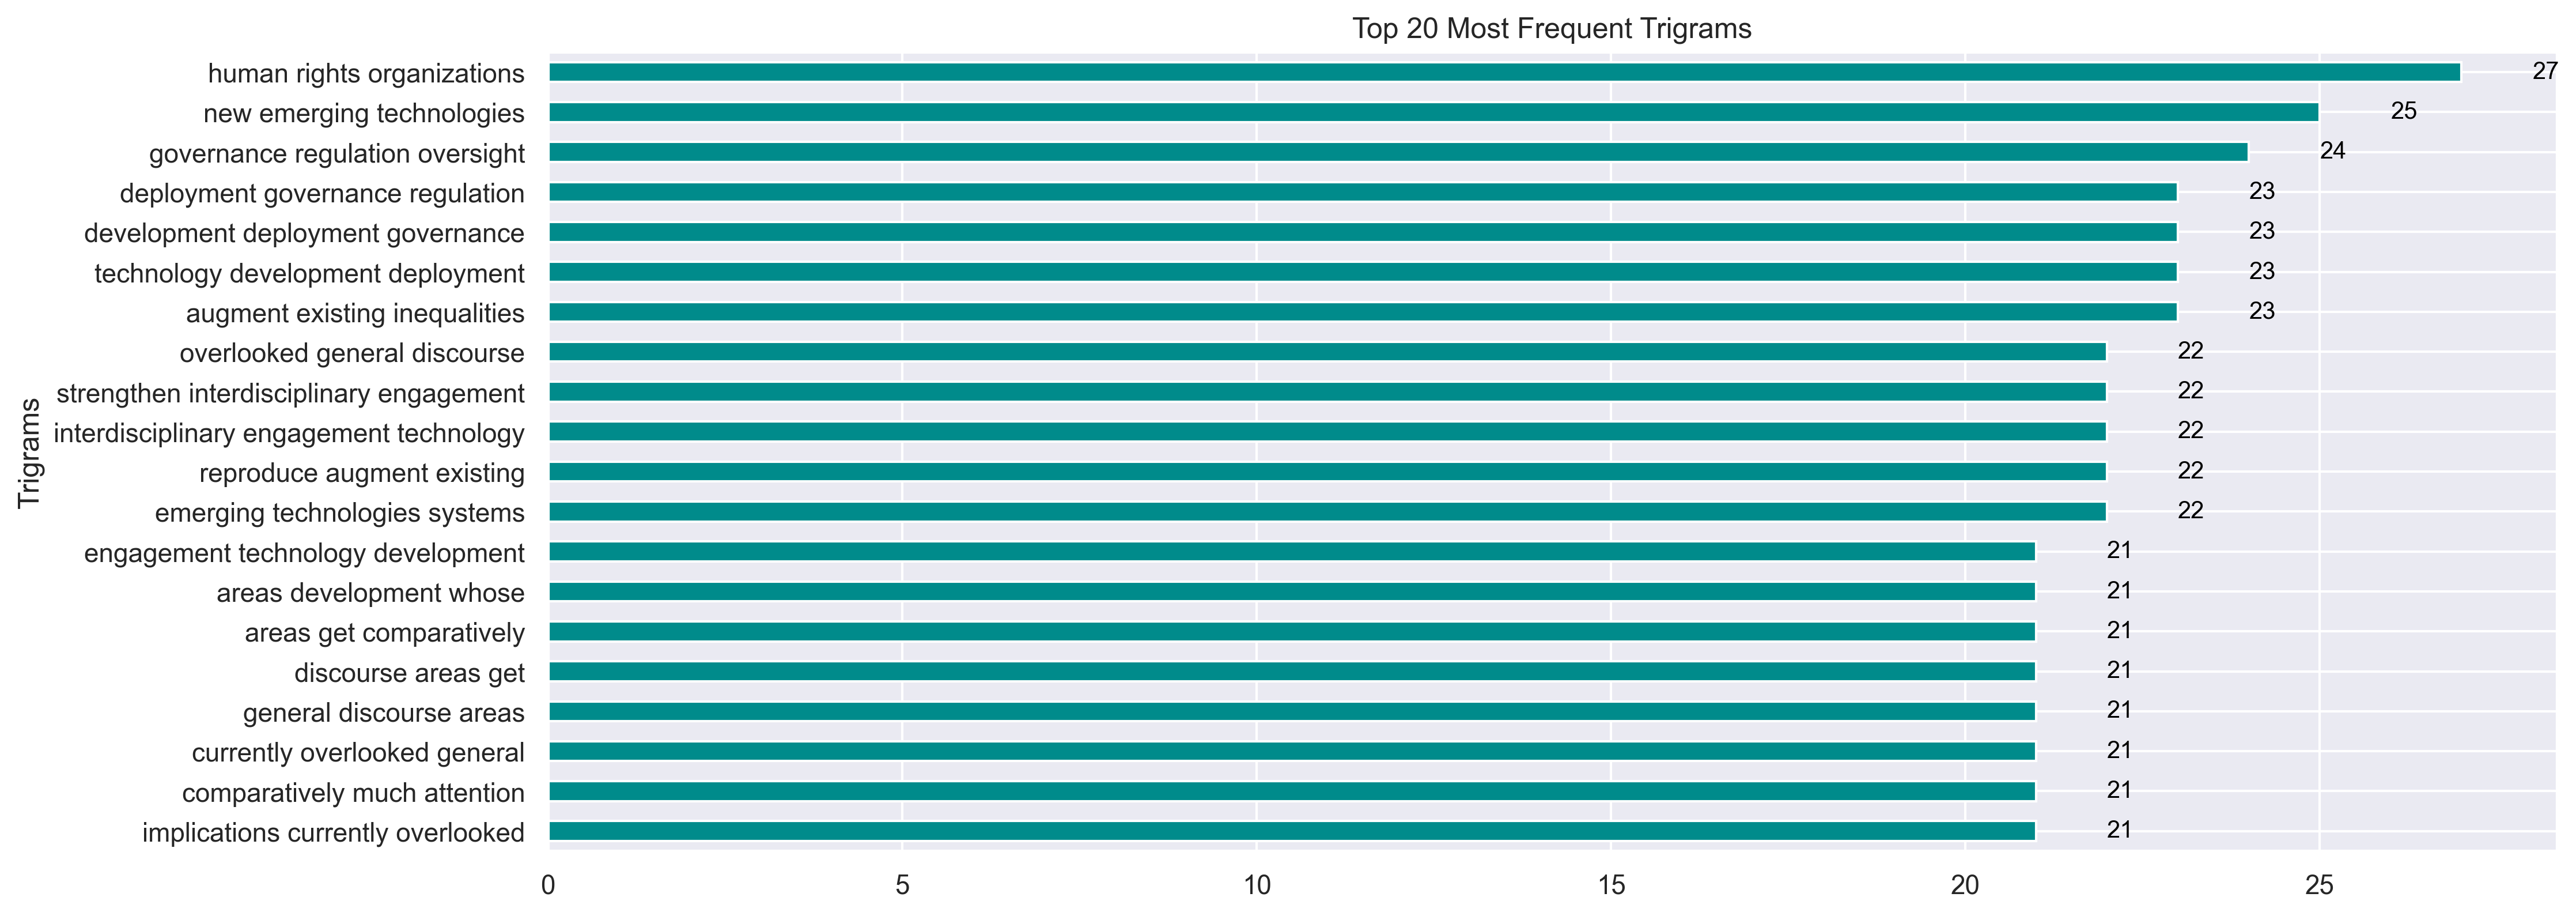

In [37]:
# creating the top 20 trigrams

trigrams = (pd.Series(nltk.ngrams(text_series, 3))
            .value_counts()
            .head(20))

# sorting the trigrams by count in descending order
trigrams_sorted = trigrams.sort_values(ascending=True)

# plotting the sorted trigrams
ax = trigrams_sorted.plot.barh(figsize=(15, 6), color="darkcyan")

plt.xlabel(None)
plt.ylabel('Trigrams')
plt.title('Top 20 Most Frequent Trigrams')

# cleaning the trigram labels
ticks, _ = plt.yticks()
labels = [f"{t[0]} {t[1]} {t[2]}" for t in trigrams_sorted.index]
_ = plt.yticks(ticks, labels)

# displaying the total count of each trigram at the end of each bar with smaller font size
for i, v in enumerate(trigrams_sorted.values):
    ax.text(v + 1, i, str(v), color='black', va='center', fontsize=10)

plt.show()

In [38]:
# getting the trigram index as a list of single text entries

trigram_list = [' '.join(word) for word in trigrams_sorted.index.tolist()]
trigram_list

['implications currently overlooked',
 'comparatively much attention',
 'currently overlooked general',
 'general discourse areas',
 'discourse areas get',
 'areas get comparatively',
 'areas development whose',
 'engagement technology development',
 'emerging technologies systems',
 'reproduce augment existing',
 'interdisciplinary engagement technology',
 'strengthen interdisciplinary engagement',
 'overlooked general discourse',
 'augment existing inequalities',
 'technology development deployment',
 'development deployment governance',
 'deployment governance regulation',
 'governance regulation oversight',
 'new emerging technologies',
 'human rights organizations']

----
### `Initializing ChatGPT`

* Key References: 
    - ``DeepLearning.AI`` ["Prompt Engineering for Developers"](https://learn.deeplearning.ai/chatgpt-prompt-eng/lesson/2/guidelines)

In [44]:
# this will require the use of the OpenAI and python dotenv libraries
# both libraries are pre-installed in the virtual environment

import openai
import os
from dotenv import load_dotenv

load_dotenv()

openai.api_key  = os.getenv('OPENAI_API_KEY')

#### <u>`Helper Function`</u>
Using OpenAI's `gpt-3.5-turbo` model and the [chat completions endpoint](https://platform.openai.com/docs/guides/chat). 

This helper function will make it easier to use prompts and look at the generated outputs:

In [40]:
def get_completion(prompt: str, model = "gpt-3.5-turbo"):
    
    messages = [{"role": "user", "content": prompt}]

    response = openai.ChatCompletion.create(
        model = model,
        messages = messages,
        temperature=0 # this is the degree of randomness of the model's output
    )

    return response.choices[0].message["content"]

In [41]:
# let's run a prompt test 
# initiating the prompt

prompt = f""" 
Using the following ingredients:
1. lemons
2. salmon
3. sweet potatoes
Generate three (3) unique recipes for creative dishes in JSON format with the following keys:
dish_name, originating_country, best_drink_pairing.
"""

In [42]:
# create the response object

response = get_completion(prompt)
print(response)

AuthenticationError: No API key provided. You can set your API key in code using 'openai.api_key = <API-KEY>', or you can set the environment variable OPENAI_API_KEY=<API-KEY>). If your API key is stored in a file, you can point the openai module at it with 'openai.api_key_path = <PATH>'. You can generate API keys in the OpenAI web interface. See https://platform.openai.com/account/api-keys for details.